In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_newavg.csv', usecols=[0,1,2,3,4,5,6,7,8,9], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)
df 

,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
date,,,,,,,,,
2018-01-01,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
2018-01-02,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2018-01-03,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
2018-01-04,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
2018-01-05,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-27,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
2022-10-28,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
2022-10-29,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0


In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pm10,1765.0,52.53,21.76,18.00,36.00,48.00,64.00,156.00
co,1765.0,1.24,10.12,0.16,0.58,0.82,1.11,417.56
no2,1765.0,22.71,11.96,3.91,13.65,19.68,29.50,82.32
pm25,1708.0,21.14,12.77,1.00,12.00,17.00,26.00,97.00
avgT,1695.0,30.24,1.76,16.60,29.30,30.30,31.30,35.10
humid,1765.0,73.93,8.26,32.00,69.00,74.00,79.00,97.00
pressure-monthly,1765.0,1008.48,2.13,1004.94,1006.53,1008.20,1010.15,1012.61
windDir,1735.0,188.91,85.55,0.00,120.00,190.00,250.00,360.00
windSpd,1737.0,8.07,2.61,1.00,6.00,8.00,9.00,24.00


In [5]:
dd = df.drop(['pm10', 'no2', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

,pm25
date,
2018-01-01,21.0
2018-01-02,26.0
2018-01-03,38.0
2018-01-04,39.0
2018-01-05,51.0


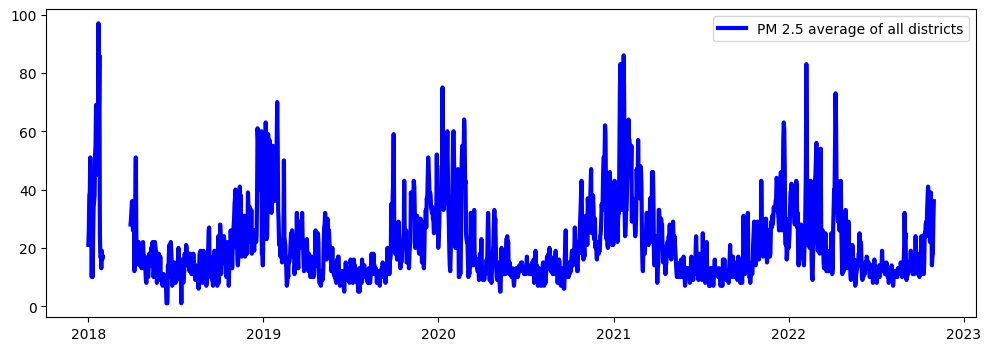

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 average of all districts')
plt.legend()
plt.show()

In [7]:
y_col='pm25'

In [8]:
df.dropna(subset=[y_col], inplace=True)
df = df.reset_index(drop=True)
df

,pm10,co,no2,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,49,0.984565,29.330435,21.0,27.1,70,1009.40,100.0,9.0
1,57,1.016304,35.128261,26.0,27.5,67,1009.40,120.0,4.0
2,74,1.292083,43.541667,38.0,28.2,66,1009.40,60.0,4.0
3,85,1.308261,42.458696,39.0,29.3,64,1009.40,330.0,6.0
4,92,1.175000,48.797826,51.0,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1703,50,1.000000,27.800000,14.0,28.5,79,1009.24,120.0,9.0
1704,58,1.100000,31.650000,17.0,29.6,72,1009.24,170.0,7.0
1705,58,0.900000,33.900000,18.0,29.5,62,1009.24,120.0,13.0
1706,73,1.100000,44.900000,29.0,30.0,62,1009.24,120.0,13.0


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1708 non-null   int64  
 1   co                1708 non-null   float64
 2   no2               1708 non-null   float64
 3   pm25              1708 non-null   float64
 4   avgT              1680 non-null   float64
 5   humid             1708 non-null   int64  
 6   pressure-monthly  1708 non-null   float64
 7   windDir           1678 non-null   float64
 8   windSpd           1680 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 120.2 KB


(1708, 9)

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.22463768, 0.00197583, 0.32420082, 0.20833333, 0.56756757,
        0.58461538, 0.58148631, 0.27777778, 0.34782609],
       [0.2826087 , 0.00205187, 0.39815002, 0.26041667, 0.58918919,
        0.53846154, 0.58148631, 0.33333333, 0.13043478],
       [0.4057971 , 0.00271257, 0.50546   , 0.38541667, 0.62702703,
        0.52307692, 0.58148631, 0.16666667, 0.13043478],
       [0.48550725, 0.00275133, 0.4916471 , 0.39583333, 0.68648649,
        0.49230769, 0.58148631, 0.91666667, 0.2173913 ],
       [0.53623188, 0.00243207, 0.57250044, 0.52083333, 0.74594595,
        0.47692308, 0.58148631,        nan,        nan],
       [0.49275362, 0.00182218, 0.42870571, 0.42708333, 0.71351351,
        0.58461538, 0.58148631, 0.33333333, 0.04347826],
       [0.15942029, 0.00096335, 0.15021087, 0.26041667, 0.68108108,
        0.70769231, 0.58148631, 0.38888889, 0.04347826],
       [0.11594203, 0.00106543, 0.18428794, 0.09375   , 0.71351351,
        0.69230769, 0.58148631, 0.38888889, 0.08695652],


In [11]:
n_train = int(df.shape[0] * 0.80)
n_train

1366

In [12]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [13]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((1366, 9), (342, 9))

In [14]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [16]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [17]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [18]:
model = deep_learner.LSTModel() 

Epoch 1/60
6/6 [==============================] - 2s 55ms/step - loss: 609.6084 - val_loss: 403.5777
Epoch 2/60
6/6 [==============================] - 0s 12ms/step - loss: 538.9299 - val_loss: 350.8688
Epoch 3/60
6/6 [==============================] - 0s 13ms/step - loss: 456.6005 - val_loss: 283.7592
Epoch 4/60
6/6 [==============================] - 0s 13ms/step - loss: 345.0870 - val_loss: 191.1698
Epoch 5/60
6/6 [==============================] - 0s 12ms/step - loss: 206.4010 - val_loss: 112.5670
Epoch 6/60
6/6 [==============================] - 0s 11ms/step - loss: 138.6123 - val_loss: 97.9925
Epoch 7/60
6/6 [==============================] - 0s 13ms/step - loss: 97.4414 - val_loss: 63.0352
Epoch 8/60
6/6 [==============================] - 0s 12ms/step - loss: 71.7627 - val_loss: 53.5719
Epoch 9/60
6/6 [==============================] - 0s 12ms/step - loss: 63.7198 - val_loss: 44.3860
Epoch 10/60
6/6 [==============================] - 0s 11ms/step - loss: 54.7092 - val_loss: 40.290

In [19]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

8/8 [==============================] - 0s 2ms/step


In [20]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
7/7 [==============================] - 1s 60ms/step - loss: 206.8101
Epoch 2/10
7/7 [==============================] - 0s 65ms/step - loss: 106.7576
Epoch 3/10
7/7 [==============================] - 0s 63ms/step - loss: 82.0639
Epoch 4/10
7/7 [==============================] - 1s 92ms/step - loss: 62.0051
Epoch 5/10
7/7 [==============================] - 1s 129ms/step - loss: 54.9095
Epoch 6/10
7/7 [==============================] - 1s 135ms/step - loss: 53.8059
Epoch 7/10
7/7 [==============================] - 1s 152ms/step - loss: 49.6932
Epoch 8/10
7/7 [==============================] - 1s 148ms/step - loss: 46.7957
Epoch 9/10
7/7 [==============================] - 0s 66ms/step - loss: 44.7055
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


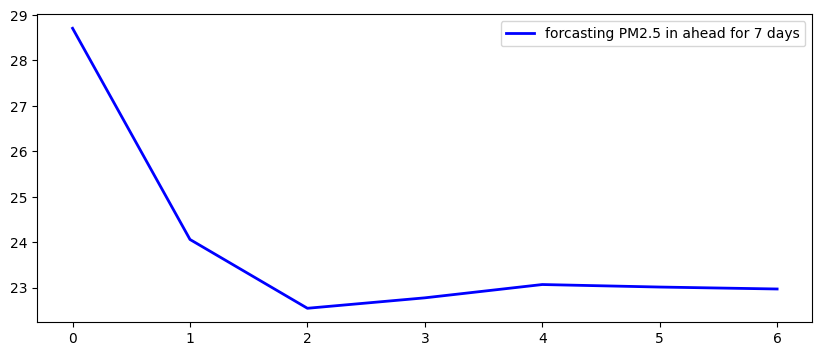

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [22]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

,พยากรณ์ PM2.5
0,28.709381
1,24.058290
2,22.543232
3,22.773232
4,23.066210
5,23.010862
6,22.967983


In [23]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,29.0
1,24.0
2,23.0
3,23.0
4,23.0
5,23.0
6,23.0


In [24]:
ypred.mean().round(0)

พยากรณ์ PM2.5    24.0
dtype: float32

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypred,yhat)
p_mse = mse*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 5.049213021993637
RMSE 2.2470453982938654
